In [1]:
#import all the necessary modules

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import warnings
warnings.filterwarnings('ignore')

In [3]:
#read the dataset from remote machine 

In [4]:
A = pd.read_csv("C:/Users/vipul ghare/Desktop/ETL Hive/csvfiles/practise/Titanicdata.csv")

In [5]:
#preview the dataset

In [6]:
A.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
#check for any null value

In [10]:
A.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
# drop the "Cabin" column from the dataframe

In [11]:
A = A.drop(columns='Cabin', axis=1)

In [12]:
# getting some statistical measures about the data

In [13]:
A.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [15]:
A.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [14]:
#Dropping unnecessary columns 

In [19]:
A = A.drop(columns=["PassengerId","Name","Ticket"], axis=1)

In [20]:
A.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [21]:
#check for any null value

In [22]:
A.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [23]:
#Handling Missing vaues

In [24]:
cat = []
con = []
for i in A.columns:
    if(A[i].dtypes=="object"):
        cat.append(i)
    else:
        con.append(i)

In [25]:
Q = pd.DataFrame(A.isna().sum(),columns=["CT"])
missingcolumns = list(Q[Q.CT > 0].index)
for i in missingcolumns:
    if(A[i].dtypes=="object"):
        replacer = A[i].mode()[0]
        A[i] = A[i].fillna(replacer)
    else:
        replacer = A[i].mean()
        A[i] = A[i].fillna(replacer)

In [26]:
A.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [27]:
#Exploratory Data Analysis(EDA)

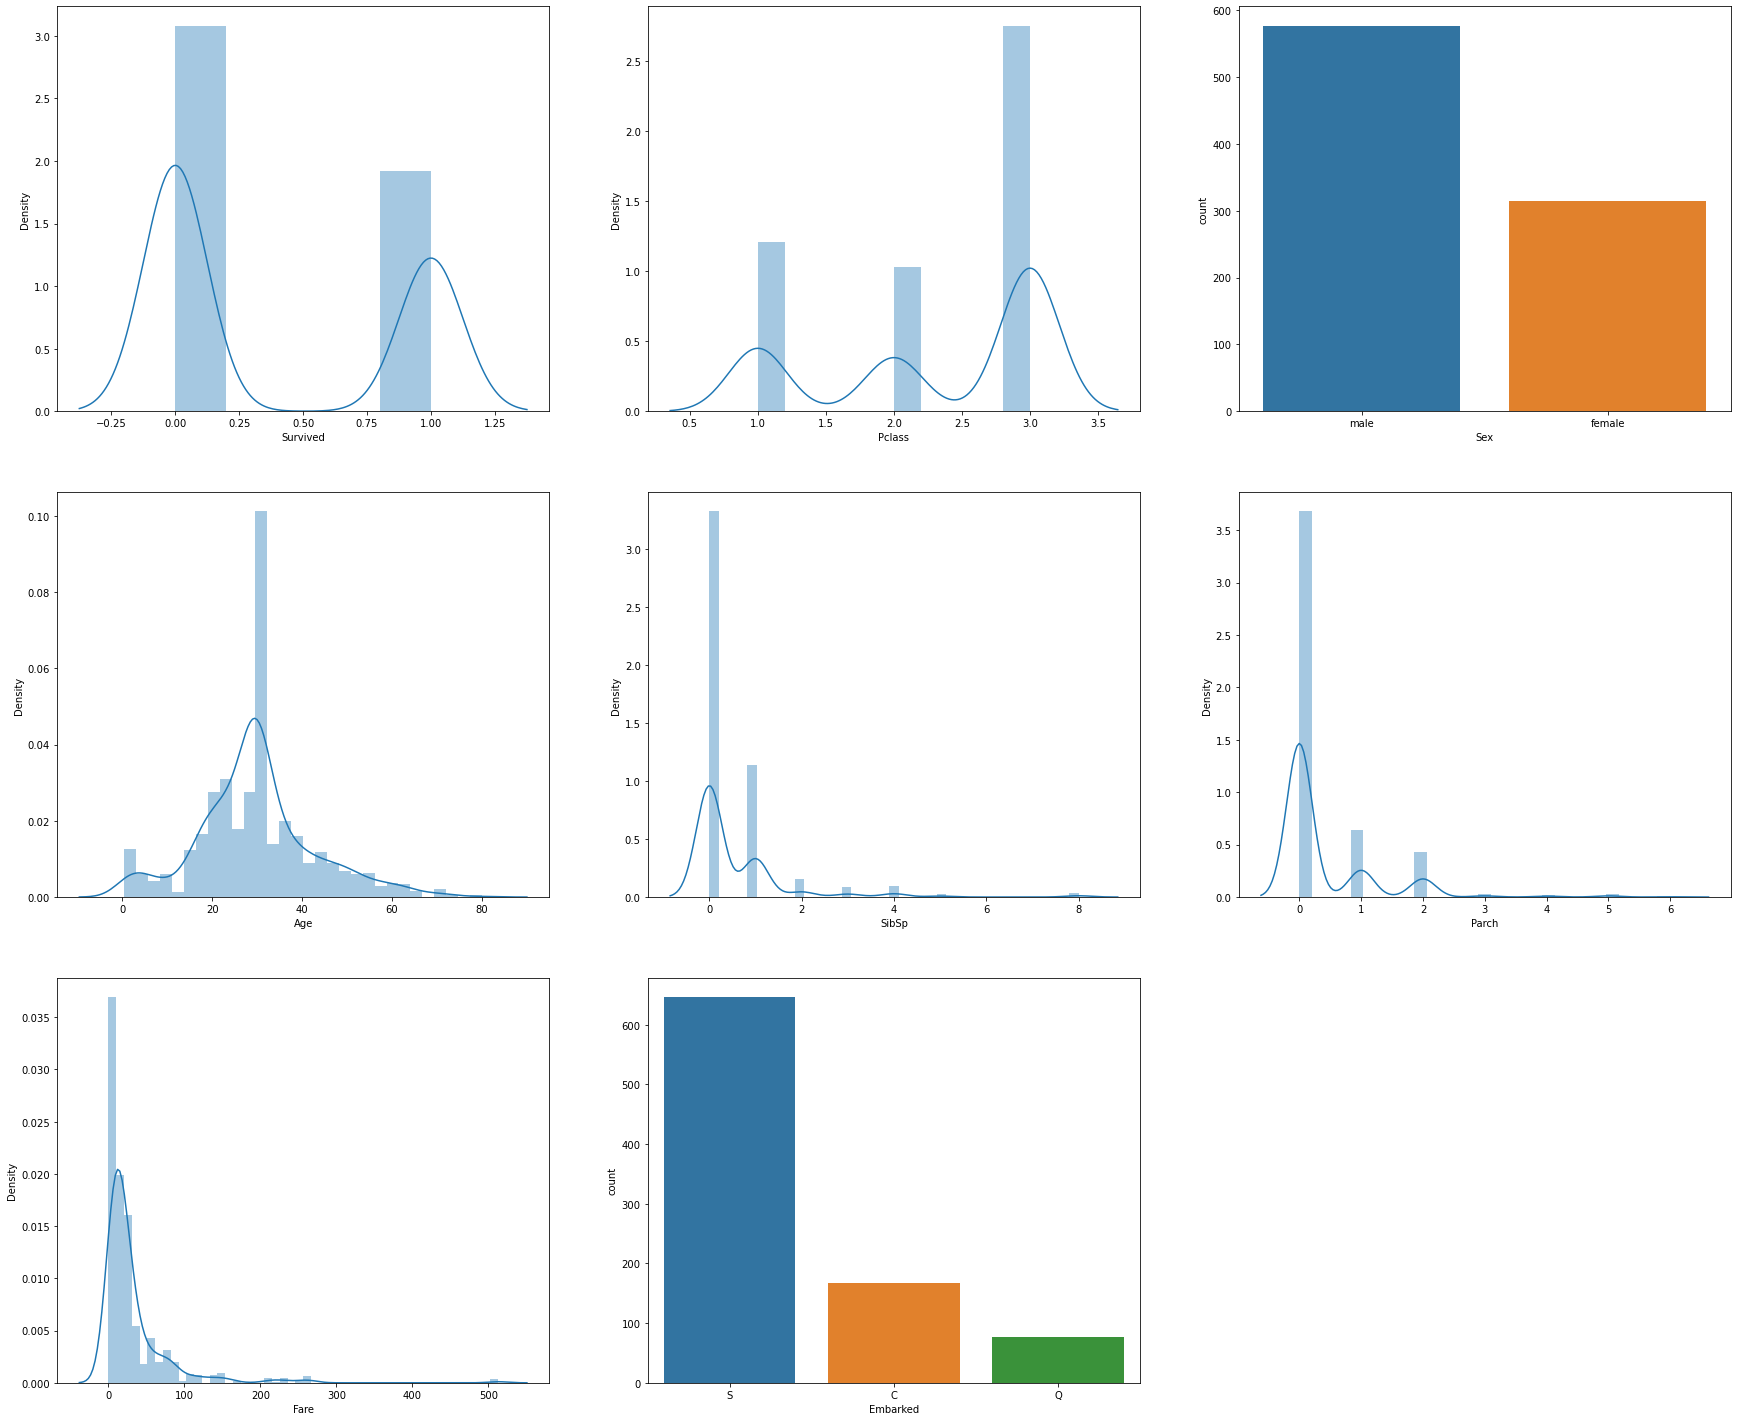

In [28]:
plt.figure(figsize=(30,70))
m = 1
for i in A.columns:
    plt.subplot(A.shape[1],3,m)
    if(A[i].dtypes=="object"):
        sb.countplot(A[i])
    else:
        sb.distplot(A[i])
    m = m + 1

In [29]:
#Declare Predictor and Target varibale

In [30]:
Y=A[["Survived"]]

In [33]:
X = A.drop(labels=["Survived"],axis = 1)
cat =[]
con =[]
for i in X.columns:
    if(X[i].dtypes=="object"):
        cat.append(i)
    else:
        con.append(i)
            
from sklearn.preprocessing import StandardScaler #standarize the data
ss = StandardScaler()
Qcon = pd.DataFrame(ss.fit_transform(X[con]),columns=con)
    
Qcat = pd.get_dummies(X[cat])
    
X = Qcon.join(Qcat)

In [34]:
X

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0.827377,-0.592481,0.432793,-0.473674,-0.502445,0,1,0,0,1
1,-1.566107,0.638789,0.432793,-0.473674,0.786845,1,0,1,0,0
2,0.827377,-0.284663,-0.474545,-0.473674,-0.488854,1,0,0,0,1
3,-1.566107,0.407926,0.432793,-0.473674,0.420730,1,0,0,0,1
4,0.827377,0.407926,-0.474545,-0.473674,-0.486337,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...
886,-0.369365,-0.207709,-0.474545,-0.473674,-0.386671,0,1,0,0,1
887,-1.566107,-0.823344,-0.474545,-0.473674,-0.044381,1,0,0,0,1
888,0.827377,0.000000,0.432793,2.008933,-0.176263,1,0,0,0,1
889,-1.566107,-0.284663,-0.474545,-0.473674,-0.044381,0,1,1,0,0


In [35]:
Y.head()

,Survived
0,0
1,1
2,1
3,1
4,0


In [36]:
X.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0.827377,-0.592481,0.432793,-0.473674,-0.502445,0,1,0,0,1
1,-1.566107,0.638789,0.432793,-0.473674,0.786845,1,0,1,0,0
2,0.827377,-0.284663,-0.474545,-0.473674,-0.488854,1,0,0,0,1
3,-1.566107,0.407926,0.432793,-0.473674,0.420730,1,0,0,0,1
4,0.827377,0.407926,-0.474545,-0.473674,-0.486337,0,1,0,0,1


In [37]:
#split the data in training and testing data

In [38]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2,random_state=20)

In [39]:
# Fitting LogisticRegression to the Training set

In [42]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
model = lr.fit(xtrain,ytrain)
pred_ts = model.predict(xtest)
pred_tr = model.predict(xtrain)

In [44]:
#Calculation of Accuracy of the model

In [46]:
from sklearn.metrics import accuracy_score
print("Training Accuracy :",accuracy_score(ytrain,pred_tr)*100)
print("Testing Accuracy :",accuracy_score(ytest,pred_ts)*100)

Training Accuracy : 79.91573033707866
Testing Accuracy : 81.56424581005587
